# Clonar repositorio

Para replicar los resultados seguir acceder a las bases de datos utilizados se debe clonar el repositorio completo. Ejecutar los siguientes comandos.

In [ ]:
!git clone https://github.com/LaurenteEber/Indice_de_densidad_del_estado.git
%cd /content/Indice_de_densidad_del_estado/indicador_ide

# Dependencias

In [4]:
import pandas as pd
import numpy as np
from samplics.estimation.expansion import TaylorEstimator

In [5]:
poblacion_2017 = pd.read_excel("../base_datos/INEI_población.xlsx", sheet_name="2015-2017", skiprows=2)
poblacion_2017 = poblacion_2017.iloc[1:27,[1,8]]
poblacion_2017.columns = ["Departamento", "Población"]
poblacion_2017.loc[1,"Población"] = poblacion_2017["Población"].sum()
poblacion_2017.reset_index(drop=True, inplace=True)
poblacion_2017["Año"] = 2017
poblacion_2017["Ubigeo"] = poblacion_2017.index
poblacion_2017 = poblacion_2017[["Año", "Ubigeo", "Departamento", "Población"]]
poblacion_2017


,Año,Ubigeo,Departamento,Población
0,2017,0,PERÚ,30973992
1,2017,1,AMAZONAS,415469
2,2017,2,ÁNCASH,1140486
3,2017,3,APURÍMAC,424717
4,2017,4,AREQUIPA,1392144
5,2017,5,AYACUCHO,653101
6,2017,6,CAJAMARCA,1427598
7,2017,7,CALLAO,1051572
8,2017,8,CUSCO,1299643
9,2017,9,HUANCAVELICA,381277


In [6]:
poblacion_2020 = pd.read_excel("../base_datos/INEI_población.xlsx", sheet_name="2018-2020", skiprows=2)
poblacion_2020 = poblacion_2020.iloc[1:27,[1,8]]
poblacion_2020.columns = ["Departamento", "Población"]
poblacion_2020.loc[1,"Población"] = poblacion_2020["Población"].sum()
poblacion_2020.reset_index(drop=True, inplace=True)
poblacion_2020["Año"] = 2020
poblacion_2020["Ubigeo"] = poblacion_2020.index
poblacion_2020 = poblacion_2020[["Año", "Ubigeo", "Departamento", "Población"]]
poblacion_2020

,Año,Ubigeo,Departamento,Población
0,2020,0,PERÚ,32625948
1,2020,1,AMAZONAS,426806
2,2020,2,ÁNCASH,1180638
3,2020,3,APURÍMAC,430736
4,2020,4,AREQUIPA,1497438
5,2020,5,AYACUCHO,668213
6,2020,6,CAJAMARCA,1453711
7,2020,7,CALLAO,1129854
8,2020,8,CUSCO,1357075
9,2020,9,HUANCAVELICA,365317


In [7]:
poblacion_2022 = pd.read_excel("../base_datos/INEI_población.xlsx", sheet_name="2021-2022", skiprows=2)
poblacion_2022 = poblacion_2022.iloc[1:27,[1,5]]
poblacion_2022.columns = ["Departamento", "Población"]
poblacion_2022.loc[1,"Población"] = poblacion_2022["Población"].sum()
poblacion_2022.reset_index(drop=True, inplace=True)
poblacion_2022["Año"] = 2022
poblacion_2022["Ubigeo"] = poblacion_2022.index
poblacion_2022 = poblacion_2022[["Año", "Ubigeo", "Departamento", "Población"]]
poblacion_2022

,Año,Ubigeo,Departamento,Población
0,2022,0,PERÚ,33396698
1,2022,1,AMAZONAS,429483
2,2022,2,ÁNCASH,1194156
3,2022,3,APURÍMAC,429720
4,2022,4,AREQUIPA,1553994
5,2022,5,AYACUCHO,670579
6,2022,6,CAJAMARCA,1454217
7,2022,7,CALLAO,1171648
8,2022,8,CUSCO,1380594
9,2022,9,HUANCAVELICA,350845


In [8]:
tabla_base = pd.concat([poblacion_2017, poblacion_2020, poblacion_2022], axis=0).reset_index(drop=True)
tabla_base

,Año,Ubigeo,Departamento,Población
0,2017,0,PERÚ,30973992
1,2017,1,AMAZONAS,415469
2,2017,2,ÁNCASH,1140486
3,2017,3,APURÍMAC,424717
4,2017,4,AREQUIPA,1392144
...,...,...,...,...
73,2022,21,PUNO,1226353
74,2022,22,SAN MARTÍN,924384
75,2022,23,TACNA,384222
76,2022,24,TUMBES,259556


# Componentes de IDE

https://www.undp.org/es/peru/publications/el-reto-de-la-igualdad

\
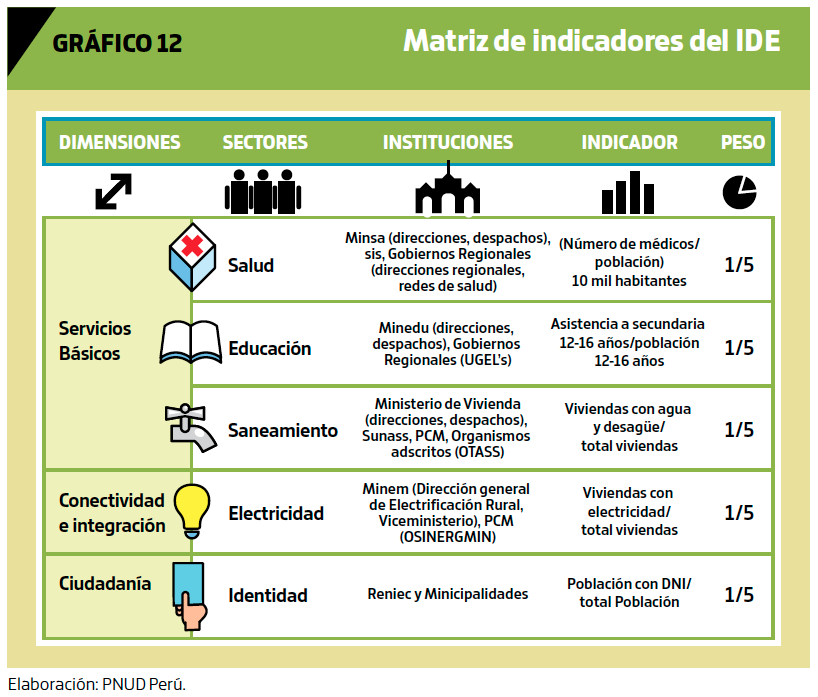

## 1. Salud: _Tasa de médicos por habitante_

$I_{salud} = \frac{P_{i}^{med}}{P_{i}} * 10,000$

Donde:
- $P_{i}^{med}$ : Médicos en territorio $i$
- $P_{i}$ : Población en territorio $i$

\
Fuente: Colegio Médico del Perú (CMP) _(recopilado y procesado por el INEI)_.
\
Base de datos: Plataforma de indicadores del INEI
\
Indicadore en fuente: NÚMERO DE MÉDICOS COLEGIADOS, SEGÚN DEPARTAMENTO, 2011-2020
\
Enlace: https://m.inei.gob.pe/estadisticas/indice-tematico/sociales/


In [9]:
base_isalud = pd.read_excel("../base_datos/médicos_por_población_2020.xlsx", skiprows=4)
base_isalud


,Departamento,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Nacional,56524.0,59163.0,62193.0,65082.0,68515.0,71739.0,74981.0,78582.0,82436.0,86252.0,90094.0
1,Amazonas,196.0,205.0,215.0,227.0,234.0,239.0,248.0,254.0,263.0,265.0,272.0
2,Áncash,955.0,1044.0,1146.0,1218.0,1326.0,1355.0,1423.0,1494.0,1577.0,1645.0,1718.0
3,Apurímac,308.0,326.0,344.0,367.0,403.0,434.0,457.0,475.0,484.0,491.0,489.0
4,Arequipa,4146.0,4330.0,4546.0,4746.0,4976.0,5224.0,5390.0,5632.0,5892.0,6105.0,6317.0
5,Ayacucho,339.0,350.0,369.0,391.0,415.0,431.0,442.0,455.0,470.0,477.0,502.0
6,Cajamarca,578.0,614.0,655.0,688.0,738.0,790.0,823.0,873.0,917.0,959.0,993.0
7,Prov. Const. del Callao,2110.0,2164.0,2205.0,2234.0,2272.0,2296.0,2307.0,2314.0,2316.0,2316.0,2298.0
8,Cusco,1535.0,1646.0,1751.0,1857.0,1998.0,2137.0,2295.0,2451.0,2635.0,2804.0,2964.0
9,Huancavelica,229.0,242.0,261.0,271.0,282.0,292.0,304.0,308.0,311.0,313.0,317.0


In [10]:
# Limpieza de data
# Solo ejecutar 1 vez
base_isalud = base_isalud.iloc[0:26,[0,8,11]] 
base_isalud[2022] = base_isalud[2020]
base_isalud["Ubigeo"] = base_isalud.index
base_isalud = base_isalud[["Ubigeo", "Departamento", 2017, 2020, 2022]]
base_isalud = base_isalud.melt(id_vars=['Ubigeo', 'Departamento'], var_name='Año', value_name='Cant_medicos')
base_isalud

,Ubigeo,Departamento,Año,Cant_medicos
0,0,Nacional,2017,78582.0
1,1,Amazonas,2017,254.0
2,2,Áncash,2017,1494.0
3,3,Apurímac,2017,475.0
4,4,Arequipa,2017,5632.0
...,...,...,...,...
73,21,Puno,2022,1796.0
74,22,San Martín,2022,630.0
75,23,Tacna,2022,1251.0
76,24,Tumbes,2022,236.0


In [11]:
# Creamos el indicador i_salud
tabla_base["i_salud"] = base_isalud["Cant_medicos"]/tabla_base["Población"]*10000
tabla_base

,Año,Ubigeo,Departamento,Población,i_salud
0,2017,0,PERÚ,30973992,25.370317
1,2017,1,AMAZONAS,415469,6.113573
2,2017,2,ÁNCASH,1140486,13.099679
3,2017,3,APURÍMAC,424717,11.183918
4,2017,4,AREQUIPA,1392144,40.455585
...,...,...,...,...,...
73,2022,21,PUNO,1226353,14.645049
74,2022,22,SAN MARTÍN,924384,6.815349
75,2022,23,TACNA,384222,32.559302
76,2022,24,TUMBES,259556,9.09245


## 2. Educación: _Porcentaje de población de 12 a 16 años matriculado en educación secundaria_

$I_{educación} = \frac{P_{i}^{mat(12-16)}}{P_{i}^{12-16}}$

Donde:
- $P_{i}^{mat}$ : Población de 12 a 16 años en el territorio $i$ matriculado en educación secundaria
- $P_{i}$ : Población en territorio $i$

\
Base de datos: Escale (procesado del ENAHO).
\
Fuente: Minedu, Escale
\
Indicador en fuente: Tasa neta de matricula educación secundaria
\
Enlace: https://escale.minedu.gob.pe/ueetendencias2016?p_auth=BxlOK19v&p_p_id=TendenciasActualPortlet2016_WAR_tendencias2016portlet_INSTANCE_t6xG&p_p_lifecycle=1&p_p_state=normal&p_p_mode=view&p_p_col_id=column-1&p_p_col_pos=1&p_p_col_count=3&_TendenciasActualPortlet2016_WAR_tendencias2016portlet_INSTANCE_t6xG_idCuadro=263

In [12]:
base_ieducacion = pd.read_excel("../base_datos/Tasa_neta_de_matrícula_educación_secundaria_2022.xlsx", skiprows=4)
base_ieducacion.head(27)

,Unnamed: 0,Departamentos,2016,2017,2018,2019,2020,2021,2022
0,NaN,PERÚ,83.679598,85.046746,86.079362,87.726992,85.626486,86.967455,87.754387
1,NaN,Amazonas,71.383050,79.365117,83.397530,84.300805,82.480754,84.921162,87.129642
2,NaN,Áncash,88.096323,86.729416,87.804137,88.749532,87.617957,86.958548,87.415435
3,NaN,Apurímac,84.845110,87.851468,90.216541,87.564576,87.555774,89.025352,91.467739
4,NaN,Arequipa,88.656810,90.110396,90.919226,92.549884,91.505609,88.734386,91.678539
5,NaN,Ayacucho,84.575165,88.873051,88.005673,89.020221,87.339710,86.846276,89.415705
6,NaN,Cajamarca,79.061187,82.493857,83.081377,87.096211,87.270201,88.047993,89.232288
7,NaN,Callao,85.868418,81.254737,85.665937,87.688281,87.001803,86.999541,85.338978
8,NaN,Cusco,87.891068,86.375886,85.172822,89.723249,89.925016,90.464281,89.754290
9,NaN,Huancavelica,89.218331,88.260063,87.929260,91.314037,89.372762,91.393823,92.122972


In [13]:
# Limpieza de data
# Solo ejecutar 1 vez
base_ieducacion = base_ieducacion.iloc[0:26,[1,3,6,8]] 
base_ieducacion["Ubigeo"] = base_ieducacion.index
base_ieducacion = base_ieducacion[["Ubigeo", "Departamentos", 2017, 2020, 2022]]
base_ieducacion = base_ieducacion.melt(id_vars=['Ubigeo', 'Departamentos'], var_name='Año', value_name='Matricula_sec')
base_ieducacion

,Ubigeo,Departamentos,Año,Matricula_sec
0,0,PERÚ,2017,85.046746
1,1,Amazonas,2017,79.365117
2,2,Áncash,2017,86.729416
3,3,Apurímac,2017,87.851468
4,4,Arequipa,2017,90.110396
...,...,...,...,...
73,21,Piura,2022,85.494023
74,22,Puno,2022,91.868128
75,23,San Martín,2022,87.428464
76,24,Tacna,2022,96.458795


In [14]:
# Creamos el indicador i_educacion
tabla_base["i_educacion"] = base_ieducacion["Matricula_sec"]
tabla_base

,Año,Ubigeo,Departamento,Población,i_salud,i_educacion
0,2017,0,PERÚ,30973992,25.370317,85.046746
1,2017,1,AMAZONAS,415469,6.113573,79.365117
2,2017,2,ÁNCASH,1140486,13.099679,86.729416
3,2017,3,APURÍMAC,424717,11.183918,87.851468
4,2017,4,AREQUIPA,1392144,40.455585,90.110396
...,...,...,...,...,...,...
73,2022,21,PUNO,1226353,14.645049,85.494023
74,2022,22,SAN MARTÍN,924384,6.815349,91.868128
75,2022,23,TACNA,384222,32.559302,87.428464
76,2022,24,TUMBES,259556,9.09245,96.458795


## 3. Saneamiento: _Porcentaje de viviendas con acceso a agua e instalaciones sanitarias_

$I_{saneamiento} = \frac{V_{i}^{san}}{V_{i}} * 100$

Donde:
- $P_{i}^{san}$ : Viviendas con acceso a agua e instralaciones sanitarias en el territorio $i$
- $P_{i}$ : Viviendas en el territorio $i$

\
Acceso a agua potable potable:
- Acceso red pública dentro de la vivienda
- Acceso red pública fuera de la vivienda, pero dentro del edificio
- Acceso por pilón de uso público

\
Instalaciones sanitarias:
- Acceso a red pública de desagüe dentro de la vivienda
- Acceso a red pública de desagüe fuera de la vivienda, pero dentro del edificio
- Letrina con tratamiento
- Pozo séptico, tanque séptico o biodigestor
- Pozo ciego o negro

\
Base de datos: ENAHO 2022 (https://proyectos.inei.gob.pe/iinei/srienaho/Consulta_por_Encuesta.asp)


In [15]:
enapres2017_100 = pd.read_spss("../base_datos/ENAPRES2017_CAP100_URBANO_RURAL_3.sav", convert_categoricals=False)
enapres2017_100

,PER,ANIO,MES,CONGLOMERADO,NSELV,TSELV,VIVREM,NUMVIVREM,AREA,CCDD,...,P185,P185A,P186,P186A,REGIONNATU,ESTRATO,FACTORANUAL,LONGITUD,LATITUD,ALTITUD
0,1.0,2017,01,07070,0006,1.0,0.0,NaN,1.0,01,...,1.0,1.0,1.0,1.0,2,1.0,36.74083,,,
1,1.0,2017,01,07070,0038,1.0,0.0,NaN,1.0,01,...,2.0,NaN,NaN,NaN,2,1.0,36.74083,,,
2,1.0,2017,01,07070,0072,1.0,0.0,NaN,1.0,01,...,1.0,2.0,1.0,2.0,2,1.0,36.74083,,,
3,1.0,2017,01,07070,0136,1.0,0.0,NaN,1.0,01,...,2.0,NaN,NaN,NaN,2,1.0,36.74083,,,
4,1.0,2017,01,07070,0021,1.0,1.0,29.0,1.0,01,...,2.0,NaN,NaN,NaN,2,1.0,36.74083,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42268,2.0,2017,12,15783,0021,5.0,0.0,NaN,2.0,25,...,1.0,2.0,2.0,NaN,3,NaN,42.12688,,,
42269,2.0,2017,12,15783,0022,5.0,0.0,NaN,2.0,25,...,1.0,2.0,2.0,NaN,3,NaN,42.12688,,,
42270,2.0,2017,12,15783,0023,5.0,0.0,NaN,2.0,25,...,1.0,1.0,2.0,NaN,3,NaN,42.12688,,,
42271,2.0,2017,12,15783,0024,5.0,0.0,NaN,2.0,25,...,2.0,NaN,NaN,NaN,3,NaN,42.12688,,,


In [16]:
enapres2017_100["Ubigeo"] = enapres2017_100["CCDD"].astype(int)
enapres2017_100["Ubigeo"].value_counts()

Ubigeo
15    4244
22    1919
5     1863
7     1861
13    1765
20    1714
21    1660
4     1656
16    1652
2     1627
12    1625
1     1621
8     1612
6     1606
10    1553
14    1533
11    1495
17    1485
9     1484
25    1483
3     1468
19    1451
18    1414
24    1282
23    1200
Name: count, dtype: int64

In [18]:
def crear_isaneamiento(df, col_agua, col_saneamiento):
  """
  Pregunta P142 ¿EL ABASTECIMIENTO DE AGUA EN SU HOGAR, PROCEDE DE:? Se debe seleccionar 1, 2 y 3
  Pregunta P142 ¿EL BAÑO O SERVICIO HIGIÉNICO QUE TIENE SU HOGAR, ESTA CONECTADO A:? Se debe seleccionar 1, 2, 3, 4 y 5
  """
  return np.where(
    ~(df[col_agua].isna() | df[col_saneamiento].isna()),
    np.where(
      (df[col_agua].isin([1., 2., 3.])) & (df[col_saneamiento].isin([1., 2., 3., 4., 5.])),
      100,0),
    np.nan
    )

def inferencia(
  df, 
  columna_indicador, 
  columna_departamento,
  samp_weight="FACTORANUAL", 
  stratum="TSELV", 
  psu="CONGLOMERADO"):

  df_sinna = df.copy()
  df_sinna = df_sinna.dropna(subset=[columna_indicador])
  df_sinna[columna_departamento] = df_sinna[columna_departamento].astype(int)

  if df_sinna[samp_weight].dtype == "object":
    df_sinna[samp_weight] = df_sinna[samp_weight].str.replace(",","").astype(float)

  if df_sinna[psu].dtype == "object":
    df_sinna[psu] = pd.to_numeric(df_sinna[psu], errors='coerce')

  if df_sinna[columna_indicador].dtype == "object":
    df_sinna[columna_indicador] = pd.to_numeric(df_sinna[columna_indicador], errors='coerce')

  mean_nacional = TaylorEstimator("mean")
  mean_nacional.estimate(
      y = df_sinna[columna_indicador],
      samp_weight=df_sinna[samp_weight],
      stratum=df_sinna[stratum],
      psu=df_sinna[psu],
      remove_nan=True
  )

  mean_departamental = TaylorEstimator("mean")
  mean_departamental.estimate(
      y = df_sinna[columna_indicador],
      domain = df_sinna[columna_departamento],
      samp_weight=df_sinna[samp_weight],
      stratum=df_sinna[stratum],
      psu=df_sinna[psu],
      remove_nan=True
  )
  indicador = {}
  indicador[0] = mean_nacional.__dict__["point_est"]
  indicador.update(mean_departamental.__dict__["point_est"])

  cv_indicador = {}
  cv_indicador[0] = mean_nacional.__dict__["coef_var"]
  cv_indicador.update(mean_departamental.__dict__["coef_var"])

  se_indicador = {}
  se_indicador[0] = mean_nacional.__dict__["stderror"]
  se_indicador.update(mean_departamental.__dict__["stderror"])

  df_indicador = pd.DataFrame({
    "Ubigeo": list(indicador.keys()),
    columna_indicador: list(indicador.values()),
    "Coef. var": list(cv_indicador.values()),
    "Error est.": list(se_indicador.values()),
  })
  return df_indicador


In [19]:
# Pregunta P129A ¿EL ABASTECIMIENTO DE AGUA EN SU HOGAR, PROCEDE DE:? Se debe seleccionar 1, 2 y 3
# Pregunta P142 ¿EL BAÑO O SERVICIO HIGIÉNICO QUE TIENE SU HOGAR, ESTA CONECTADO A:? Se debe seleccionar 1, 2, 3, 4 y 5
enapres2017_100["isaneamiento"]=crear_isaneamiento(df=enapres2017_100, col_agua="P129A", col_saneamiento="P142")
enapres2017_100["isaneamiento"].value_counts()

isaneamiento
100.0    32859
0.0       9414
Name: count, dtype: int64

In [20]:
i_saneamiento2017 = inferencia(
                    df=enapres2017_100,
                    columna_departamento="CCDD", 
                    columna_indicador="isaneamiento", 
                    psu="CONGLOMERADO",
                    samp_weight="FACTORANUAL", 
                    stratum="TSELV")
i_saneamiento2017["Año"] = 2017
i_saneamiento2017

,Ubigeo,isaneamiento,Coef. var,Error est.,Año
0,0,83.853283,0.005340,0.447777,2017
1,1,79.569194,0.028866,2.296846,2017
2,2,88.463154,0.019048,1.685086,2017
3,3,85.795192,0.025682,2.203353,2017
4,4,92.632246,0.012624,1.169427,2017
5,5,78.916529,0.029137,2.299428,2017
6,6,79.549804,0.026905,2.140250,2017
7,7,96.168509,0.007604,0.731226,2017
8,8,88.017667,0.019038,1.675691,2017
9,9,71.665566,0.036524,2.617537,2017


In [21]:
enapres2020_100 = pd.read_csv("../base_datos/ENAPRES2020_CAP100_URBANO_RURAL_3.csv", encoding='latin1',delimiter=";")
enapres2020_100

/var/folders/5b/8j3gwk3d5f7bf16v495j36b80000gn/T/ipykernel_62602/1128256603.py:1: DtypeWarning: Columns (55,88,167,291,295,299,303,307,311,315,319,323,324,325,329,333,337,341,345,349,353,357,358,360,362,420,489) have mixed types. Specify dtype option on import or set low_memory=False.
  enapres2020_100 = pd.read_csv("../base_datos/ENAPRES2020_CAP100_URBANO_RURAL_3.csv", encoding='latin1',delimiter=";")


,PER,ANIO,MES,CONGLOMERADO,NSELV,TSELV,VIVREM,NUMVIVREM,AREA,CCDD,...,P189_8,P189_8_O,REGIONNATU,ESTRATO,MOD_ENC,FACTOR,FACTOR_CALIBRADO,LONGITUD,LATITUD,ALTITUD
0,1,2020,1,7070,14,1,0,,1,1,...,,,2,1,1,"46,89313","95,145485",-77.873904,-6.229048,2338.711767
1,1,2020,1,7070,63,1,0,,1,1,...,,,2,1,1,"46,89313","95,145485",-77.873904,-6.229048,2338.711767
2,1,2020,1,7070,71,1,0,,1,1,...,,,2,1,1,"46,89313","95,145485",-77.873904,-6.229048,2338.711767
3,1,2020,1,7070,98,1,0,,1,1,...,,,2,1,1,"46,89313","95,145485",-77.873904,-6.229048,2338.711767
4,1,2020,1,7070,52,1,1,130,1,1,...,0,,2,1,1,"46,89313","95,145485",-77.873904,-6.229048,2338.711767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42148,2,2020,5,49254,36,5,0,,2,25,...,,,3,,2,"42,79239",,-75.019900,-8.751300,225.000000
42149,2,2020,5,49254,40,5,0,,2,25,...,,,3,,2,"42,79239",,-75.019900,-8.751300,225.000000
42150,2,2020,5,49254,41,5,0,,2,25,...,,,3,,2,"42,79239",,-75.019900,-8.751300,225.000000
42151,2,2020,5,49254,42,5,0,,2,25,...,,,3,,2,"42,79239",,-75.019900,-8.751300,225.000000


In [22]:
# Pregunta P129G ¿EL ABASTECIMIENTO DE AGUA EN SU HOGAR, PROCEDE DE:? Se debe seleccionar 1, 2 y 3
# Pregunta P142A ¿EL BAÑO O SERVICIO HIGIÉNICO QUE TIENE SU HOGAR, ESTA CONECTADO A:? Se debe seleccionar 1, 2, 3, 4 y 5
enapres2020_100["isaneamiento"]=crear_isaneamiento(df=enapres2020_100, col_agua="P129G", col_saneamiento="P142A")
enapres2020_100["isaneamiento"].value_counts()

isaneamiento
100.0    34449
0.0       7704
Name: count, dtype: int64

In [23]:
i_saneamiento2020 = inferencia(
                    df=enapres2020_100,
                    columna_departamento="CCDD", 
                    columna_indicador="isaneamiento", 
                    psu="CONGLOMERADO",
                    samp_weight="FACTOR", 
                    stratum="TSELV")
i_saneamiento2020["Año"] = 2020
i_saneamiento2020

,Ubigeo,isaneamiento,Coef. var,Error est.,Año
0,0,83.318443,0.007475,0.622768,2020
1,1,90.280065,0.021739,1.962615,2020
2,2,94.058301,0.013801,1.298094,2020
3,3,93.623717,0.011940,1.117861,2020
4,4,83.435955,0.039488,3.294683,2020
5,5,93.078324,0.014337,1.334482,2020
6,6,85.824318,0.027848,2.390007,2020
7,7,97.047949,0.006786,0.658575,2020
8,8,87.319412,0.024009,2.096416,2020
9,9,88.487257,0.016059,1.421045,2020


In [24]:
enapres2022_100 = pd.read_csv("../base_datos/ENAPRES2022_CAP_100_URBANO_RURAL_3.csv", encoding='latin1',delimiter=";")
enapres2022_100

/var/folders/5b/8j3gwk3d5f7bf16v495j36b80000gn/T/ipykernel_62602/2260784989.py:1: DtypeWarning: Columns (165) have mixed types. Specify dtype option on import or set low_memory=False.
  enapres2022_100 = pd.read_csv("../base_datos/ENAPRES2022_CAP_100_URBANO_RURAL_3.csv", encoding='latin1',delimiter=";")


,PER,ANIO,MES,CONGLOMERADO,NSELV,TSELV,VIVREM,NUMVIVREM,AREA,CCDD,...,P189_4,P189_5,P189_6,P189_7,P189_8,P189_8_O,REGIONNATU,ESTRATO,MOD_ENC,FACTOR
0,1,2022,1,94,8,1,0,,1,24,...,,,,,,,1,3,1,"113,8948"
1,1,2022,1,94,23,1,0,,1,24,...,,,,,,,1,3,1,"113,8948"
2,1,2022,1,94,51,1,0,,1,24,...,,,,,,,1,3,1,"113,8948"
3,1,2022,1,94,64,1,0,,1,24,...,,,,,,,1,3,1,"113,8948"
4,1,2022,1,94,92,1,0,,1,24,...,,,,,,,1,3,1,"113,8948"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41669,1,2022,12,51548,28,1,0,,1,23,...,0,1,0,0,1,MEDIOS DE COMUNICACIÓN RADIAL,1,5,1,"49,7291"
41670,1,2022,12,51548,36,1,0,,1,23,...,0,1,0,0,0,,1,5,1,"49,7291"
41671,1,2022,12,51548,54,1,0,,1,23,...,,,,,,,1,5,1,"49,7291"
41672,1,2022,12,51548,103,1,0,,1,23,...,0,1,0,0,0,,1,5,1,"49,7291"


In [25]:
# Pregunta P129G ¿EL ABASTECIMIENTO DE AGUA EN SU HOGAR, PROCEDE DE:? Se debe seleccionar 1, 2 y 3
# Pregunta P142A ¿EL BAÑO O SERVICIO HIGIÉNICO QUE TIENE SU HOGAR, ESTA CONECTADO A:? Se debe seleccionar 1, 2, 3, 4 y 5
enapres2022_100["isaneamiento"]=crear_isaneamiento(df=enapres2022_100, col_agua="P129G", col_saneamiento="P142A")
enapres2022_100["isaneamiento"].value_counts()

isaneamiento
100.0    33212
0.0       8462
Name: count, dtype: int64

In [26]:
i_saneamiento2022 = inferencia(
                    df=enapres2022_100,
                    columna_departamento="CCDD", 
                    columna_indicador="isaneamiento", 
                    psu="CONGLOMERADO",
                    samp_weight="FACTOR", 
                    stratum="TSELV")
i_saneamiento2022["Año"] = 2022
i_saneamiento2022

,Ubigeo,isaneamiento,Coef. var,Error est.,Año
0,0,85.914845,0.006056,0.520260,2022
1,1,86.479099,0.027040,2.338392,2022
2,2,88.948076,0.023809,2.117737,2022
3,3,91.798283,0.012147,1.115071,2022
4,4,94.633304,0.010488,0.992493,2022
5,5,88.726734,0.015687,1.391844,2022
6,6,81.194812,0.033370,2.709461,2022
7,7,94.738511,0.009870,0.935065,2022
8,8,89.982110,0.020549,1.849017,2022
9,9,84.774234,0.024521,2.078730,2022


In [27]:
base_isaneamiento = pd.DataFrame()
base_isaneamiento = pd.concat(
    [i_saneamiento2017.loc[:,["Año", "Ubigeo", "isaneamiento"]], 
    i_saneamiento2020.loc[:,["Año", "Ubigeo", "isaneamiento"]], 
    i_saneamiento2022.loc[:,["Año", "Ubigeo", "isaneamiento"]]],
    axis=0 )
base_isaneamiento.reset_index(drop=True, inplace=True)
base_isaneamiento

,Año,Ubigeo,isaneamiento
0,2017,0,83.853283
1,2017,1,79.569194
2,2017,2,88.463154
3,2017,3,85.795192
4,2017,4,92.632246
...,...,...,...
73,2022,21,76.170489
74,2022,22,84.230587
75,2022,23,93.174325
76,2022,24,75.529552


In [28]:
# Creamos el indicador i_saneamiento
tabla_base["i_saneamiento"] = base_isaneamiento["isaneamiento"]
tabla_base

,Año,Ubigeo,Departamento,Población,i_salud,i_educacion,i_saneamiento
0,2017,0,PERÚ,30973992,25.370317,85.046746,83.853283
1,2017,1,AMAZONAS,415469,6.113573,79.365117,79.569194
2,2017,2,ÁNCASH,1140486,13.099679,86.729416,88.463154
3,2017,3,APURÍMAC,424717,11.183918,87.851468,85.795192
4,2017,4,AREQUIPA,1392144,40.455585,90.110396,92.632246
...,...,...,...,...,...,...,...
73,2022,21,PUNO,1226353,14.645049,85.494023,76.170489
74,2022,22,SAN MARTÍN,924384,6.815349,91.868128,84.230587
75,2022,23,TACNA,384222,32.559302,87.428464,93.174325
76,2022,24,TUMBES,259556,9.09245,96.458795,75.529552


## 4. Electrificación: _Porcentaje de viviendas que cuentan con alumbrado eléctrico_

$I_{electricidad} = \frac{V_{i}^{ae}}{V_{i}}*100$

Donde:
- $P_{i}^{dni}$ : Viviendas con alumbrado en el territorio $i$
- $P_{i}$ : Viviendas en el territorio $i$

\
viviendas que cuentan con alumbrado eléctrico dentro del hogar

\
Base de datos de la Encuesta Nacional de Hogares con metodología actualizada (ENAHO)



In [29]:
mod100_2017 = pd.read_spss("../base_datos/Enaho01-2017-100.sav", convert_categoricals=False)
print(mod100_2017.shape)
mod100_2017

(43545, 314)


,AÑO,MES,NCONGLOME,CONGLOME,VIVIENDA,HOGAR,UBIGEO,DOMINIO,ESTRATO,PERIODO,...,T107C48,T1137,T113A,T1171$15,CODCCPP,NOMCCPP,LONGITUD,LATITUD,ALTITUD,FACTOR07
0,2017,12,007060,005001,002,11,010101,4.0,4.0,1.0,...,NaN,NaN,2.0,NaN,0001,AA HH SANTO TORIBIO DE MOGROVEJO,-77.879760,-6.227421,2414.0,76.290201
1,2017,12,007060,005001,014,11,010101,4.0,4.0,1.0,...,NaN,NaN,NaN,NaN,0001,AA HH SANTO TORIBIO DE MOGROVEJO,-77.879760,-6.227421,2414.0,76.290201
2,2017,12,007060,005001,023,11,010101,4.0,4.0,1.0,...,NaN,702.0,2.0,1502.0,0001,AA HH SANTO TORIBIO DE MOGROVEJO,-77.879760,-6.227421,2414.0,76.290201
3,2017,12,007060,005001,035,11,010101,4.0,4.0,1.0,...,NaN,702.0,2.0,1502.0,0001,AA HH SANTO TORIBIO DE MOGROVEJO,-77.879760,-6.227421,2414.0,76.290201
4,2017,12,007060,005001,046,11,010101,4.0,4.0,1.0,...,NaN,702.0,2.0,1502.0,0001,AA HH SANTO TORIBIO DE MOGROVEJO,-77.879760,-6.227421,2414.0,76.290201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43540,2017,11,44542,010801,025,11,230110,3.0,2.0,2.0,...,NaN,NaN,2.0,NaN,0001,ASOCIACION DEVIVIENDA 3 DE DICIEMBRE,-70.249852,-18.032258,541.0,57.101684
43541,2017,11,44542,010801,030,11,230110,3.0,2.0,2.0,...,NaN,NaN,2.0,NaN,0001,URBANIZACI N 3 DE DICIEMBRE,-70.249852,-18.032258,541.0,57.101684
43542,2017,11,44542,010801,035,11,230110,3.0,2.0,2.0,...,NaN,NaN,2.0,NaN,0001,URBANIZACI N 3 DE DICIEMBRE,-70.249852,-18.032258,541.0,57.101684
43543,2017,11,44542,010801,046,11,230110,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,0001,URBANIZACI N 3 DE DICIEMBRE,-70.249852,-18.032258,541.0,57.101684


In [30]:
mod100_2020 = pd.read_csv("../base_datos/Enaho01-2020-100.csv", encoding='latin1')
print(mod100_2020.shape)
mod100_2020

/var/folders/5b/8j3gwk3d5f7bf16v495j36b80000gn/T/ipykernel_62602/4245232086.py:1: DtypeWarning: Columns (322) have mixed types. Specify dtype option on import or set low_memory=False.
  mod100_2020 = pd.read_csv("../base_datos/Enaho01-2020-100.csv", encoding='latin1')


(53423, 331)


,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,UBIGEO,DOMINIO,ESTRATO,PERIODO,TIPENC,...,FACTOR07,FACTOR_P,RECHAZO_RAZONES,NCONGLOME,SUB_CONGLOME,CODCCPP,NOMCCPP,LONGITUD,LATITUD,ALTITUD
0,2020,1,5009,12,11,10101,4,4,1,3,...,149.202744,186.594396,,7076,0,1,CIUDAD CHACHAPOYAS,-77.861290,-6.225835,2287
1,2020,1,5009,41,11,10101,4,4,1,3,...,149.202744,186.594396,,7076,0,1,CIUDAD CHACHAPOYAS,-77.861290,-6.225835,2287
2,2020,1,5009,56,11,10101,4,4,1,3,...,149.202744,186.594396,,7076,0,1,CIUDAD CHACHAPOYAS,-77.861290,-6.225835,2287
3,2020,1,5009,84,11,10101,4,4,1,3,...,149.202744,186.594396,,7076,0,1,CIUDAD CHACHAPOYAS,-77.861290,-6.225835,2287
4,2020,1,5009,98,11,10101,4,4,1,3,...,149.202744,186.594396,,7076,0,1,CIUDAD CHACHAPOYAS,-77.861290,-6.225835,2287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53418,2020,12,20305,52,11,250301,7,4,2,1,...,275.828552,379.820045,,15122,0,1,JUNTA VECINAL LAS PALMERAS,-75.513435,-9.041584,292
53419,2020,12,20305,73,11,250301,7,4,2,1,...,275.828552,379.820045,,15122,0,1,JUNTA VECINAL PALMERAS,-75.513435,-9.041584,292
53420,2020,12,20305,94,11,250301,7,4,2,1,...,275.828552,379.820045,,15122,0,1,AGUAYTIA,-75.513435,-9.041584,292
53421,2020,12,20305,116,11,250301,7,4,2,1,...,275.828552,379.820045,,15122,0,1,JUNTA VECINAL LAS PALMERAS,-75.513435,-9.041584,292


In [31]:
mod100_2022 = pd.read_csv("../base_datos/Enaho01-2022-100.csv", encoding='latin1')
print(mod100_2022.shape)
mod100_2022

(44122, 324)


,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,UBIGEO,DOMINIO,ESTRATO,PERIODO,TIPENC,...,NBI4,NBI5,FACTOR07,NCONGLOME,SUB_CONGLOME,CODCCPP,NOMCCPP,LONGITUD,LATITUD,ALTITUD
0,2022,2,5007,3,11,10101,4,4,1,3,...,0,0,45.282372,7070,0,1,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338.0
1,2022,2,5007,12,11,10101,4,4,1,3,...,0,0,45.282372,7070,0,1,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338.0
2,2022,2,5007,22,11,10101,4,4,1,3,...,0,0,45.282372,7070,0,1,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338.0
3,2022,2,5007,31,11,10101,4,4,1,3,...,,,45.282372,7070,0,1,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338.0
4,2022,2,5007,50,11,10101,4,4,1,3,...,0,0,45.282372,7070,0,1,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44117,2022,4,21001,32,11,210903,6,8,4,5,...,0,0,321.161194,40612,0,18,MULLUCHINI,-69.361732,-15.322027,3887.0
44118,2022,4,21001,33,11,210903,6,8,4,5,...,0,0,321.161194,40612,0,18,MULLUCHINI,-69.361732,-15.322027,3887.0
44119,2022,4,21001,34,11,210903,6,8,4,5,...,0,0,321.161194,40612,0,18,MULLUCHINI,-69.361732,-15.322027,3887.0
44120,2022,4,21001,35,11,210903,6,8,4,5,...,,,321.161194,40612,0,18,MULLUCHINI,-69.361732,-15.322027,3887.0


In [32]:
mod100_2017["Departamento"] = mod100_2017["UBIGEO"].astype(str).str.zfill(6).str[:2].astype(int)
mod100_2017 = mod100_2017[mod100_2017["RESULT"].isin([1.,2.])]
mod100_2017["ielectricidad"] = np.where(
                                ~mod100_2017["P1121"].isna(),
                                np.where(mod100_2017["P1121"]==1.,100,0),
                                mod100_2017["P1121"]
                                )
print(mod100_2017["Departamento"].unique())
print(mod100_2017["RESULT"].value_counts())
print(mod100_2017["ielectricidad"].value_counts())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
RESULT
1.0    28421
2.0     6163
Name: count, dtype: int64
ielectricidad
100.0    31632
0.0       2952
Name: count, dtype: int64


/var/folders/5b/8j3gwk3d5f7bf16v495j36b80000gn/T/ipykernel_62602/551621712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod100_2017["ielectricidad"] = np.where(


In [34]:
mod100_2020["Departamento"] = mod100_2020["UBIGEO"].astype(str).str.zfill(6).str[:2].astype(int)
mod100_2020 = mod100_2020[mod100_2020["RESULT"].isin([1,2])]
mod100_2020["ielectricidad"] = np.where(
                                ~mod100_2020["P1121"].isna(),
                                np.where(mod100_2020["P1121"]=="1",100,0),
                                mod100_2020["P1121"]
                                )
print(mod100_2020["Departamento"].unique())
print(mod100_2020["RESULT"].value_counts())
print(mod100_2020["ielectricidad"].value_counts())

/var/folders/5b/8j3gwk3d5f7bf16v495j36b80000gn/T/ipykernel_62602/442689075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod100_2020["Departamento"] = mod100_2020["UBIGEO"].astype(str).str.zfill(6).str[:2].astype(int)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
RESULT
1    31189
2     3301
Name: count, dtype: int64
ielectricidad
100    32326
0       2164
Name: count, dtype: int64


In [35]:
mod100_2022["Departamento"] = mod100_2022["UBIGEO"].astype(str).str.zfill(6).str[:2].astype(int)
mod100_2022 = mod100_2022[mod100_2022["RESULT"].isin([1,2])]
mod100_2022["ielectricidad"] = np.where(
                                ~mod100_2022["P1121"].isna(),
                                np.where(mod100_2022["P1121"]=="1",100,0),
                                mod100_2022["P1121"]
                                )
print(mod100_2022["Departamento"].unique())
print(mod100_2022["RESULT"].value_counts())
print(mod100_2022["ielectricidad"].value_counts())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
RESULT
1    29212
2     5001
Name: count, dtype: int64
ielectricidad
100    31961
0       2252
Name: count, dtype: int64


/var/folders/5b/8j3gwk3d5f7bf16v495j36b80000gn/T/ipykernel_62602/2934591749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod100_2022["ielectricidad"] = np.where(


In [36]:
# Inferecia del indicador ielectricidad para el 2017
ielectricidad_2017 = inferencia(
                        df=mod100_2017,
                        columna_indicador = "ielectricidad",
                        columna_departamento = "Departamento",
                        psu="CONGLOME",
                        samp_weight="FACTOR07", 
                        stratum="ESTRATO"
                        )
ielectricidad_2017["Año"]=2017
ielectricidad_2017

,Ubigeo,ielectricidad,Coef. var,Error est.,Año
0,0,94.822977,0.001941,0.184042,2017
1,1,82.328760,0.029708,2.445797,2017
2,2,94.697276,0.009815,0.929422,2017
3,3,92.898819,0.013857,1.287334,2017
4,4,97.547041,0.005650,0.551166,2017
5,5,89.608044,0.018625,1.668908,2017
6,6,89.327602,0.015611,1.394478,2017
7,7,99.647492,0.001758,0.175230,2017
8,8,91.783494,0.015165,1.391886,2017
9,9,89.075868,0.018467,1.645008,2017


In [37]:
# Inferecia del indicador ielectricidad para el 2020
ielectricidad_2020 = inferencia(
                        df=mod100_2020,
                        columna_indicador = "ielectricidad",
                        columna_departamento = "Departamento",
                        psu="CONGLOME",
                        samp_weight="FACTOR07", 
                        stratum="ESTRATO"
                        )
ielectricidad_2020["Año"]=2020
ielectricidad_2020

,Ubigeo,ielectricidad,Coef. var,Error est.,Año
0,0,96.186824,0.001765,0.169732,2020
1,1,86.796878,0.029083,2.524289,2020
2,2,97.332502,0.006467,0.629410,2020
3,3,95.768498,0.011307,1.082886,2020
4,4,96.465085,0.010996,1.060751,2020
5,5,93.898781,0.012316,1.156472,2020
6,6,93.652469,0.011328,1.060907,2020
7,7,99.804097,0.001403,0.140027,2020
8,8,94.057050,0.012536,1.179069,2020
9,9,90.700431,0.018911,1.715198,2020


In [38]:
# Inferecia del indicador ielectricidad para el 2020
ielectricidad_2022 = inferencia(
                        df=mod100_2022,
                        columna_indicador = "ielectricidad",
                        columna_departamento = "Departamento",
                        psu="CONGLOME",
                        samp_weight="FACTOR07", 
                        stratum="ESTRATO"
                        )
ielectricidad_2022["Año"]=2022
ielectricidad_2022

,Ubigeo,ielectricidad,Coef. var,Error est.,Año
0,0,95.808435,0.001884,0.180480,2022
1,1,89.100911,0.021844,1.946303,2022
2,2,96.961905,0.006696,0.649228,2022
3,3,96.032195,0.008371,0.803842,2022
4,4,97.116775,0.008078,0.784541,2022
5,5,94.154070,0.011984,1.128348,2022
6,6,93.674936,0.011409,1.068701,2022
7,7,99.268271,0.003272,0.324848,2022
8,8,94.613448,0.011762,1.112820,2022
9,9,91.359110,0.018032,1.647382,2022


In [39]:
base_ielectricidad = pd.DataFrame()
base_ielectricidad = pd.concat(
    [ielectricidad_2017.loc[:,["Año", "Ubigeo", "ielectricidad"]], 
    ielectricidad_2020.loc[:,["Año", "Ubigeo", "ielectricidad"]], 
    ielectricidad_2022.loc[:,["Año", "Ubigeo", "ielectricidad"]]],
    axis=0 )
base_ielectricidad.reset_index(drop=True, inplace=True)
base_ielectricidad

,Año,Ubigeo,ielectricidad
0,2017,0,94.822977
1,2017,1,82.328760
2,2017,2,94.697276
3,2017,3,92.898819
4,2017,4,97.547041
...,...,...,...
73,2022,21,90.019046
74,2022,22,94.311187
75,2022,23,97.310696
76,2022,24,98.959960


In [40]:
# Creamos el indicador i_electricidad en base principal
tabla_base["i_electricidad"] = base_ielectricidad["ielectricidad"]
tabla_base

,Año,Ubigeo,Departamento,Población,i_salud,i_educacion,i_saneamiento,i_electricidad
0,2017,0,PERÚ,30973992,25.370317,85.046746,83.853283,94.822977
1,2017,1,AMAZONAS,415469,6.113573,79.365117,79.569194,82.328760
2,2017,2,ÁNCASH,1140486,13.099679,86.729416,88.463154,94.697276
3,2017,3,APURÍMAC,424717,11.183918,87.851468,85.795192,92.898819
4,2017,4,AREQUIPA,1392144,40.455585,90.110396,92.632246,97.547041
...,...,...,...,...,...,...,...,...
73,2022,21,PUNO,1226353,14.645049,85.494023,76.170489,90.019046
74,2022,22,SAN MARTÍN,924384,6.815349,91.868128,84.230587,94.311187
75,2022,23,TACNA,384222,32.559302,87.428464,93.174325,97.310696
76,2022,24,TUMBES,259556,9.09245,96.458795,75.529552,98.959960


## 5. Identidad: _Porcentaje de población con DNI_

$I_{identidad} = \frac{P_{i}^{dni}}{P_{i}}$

Donde:
- $P_{i}^{dni}$ : Población con DNI en territorio $i$
- $P_{i}$ : Población en territorio $i$

\
Encuestas nacionales del INEI

In [41]:
enapres2017_300 = pd.read_spss("../base_datos/ENAPRES2017_CAP_300_URBANO_RURAL_5.sav", convert_categoricals=False)
print(enapres2017_300.shape)
enapres2017_300.head()

(148966, 157)


,PER,ANIO,MES,CONGLOMERADO,NSELV,TSELV,VIVREM,NUMVIVREM,AREA,CCDD,...,P201,P204,P205,P206,P207,P208_A,P208_B,REGIONNATU,ESTRATO,FACTORANUAL
0,1.0,2017,01,00039,0030,1.0,0.0,NaN,1.0,24,...,1.0,1.0,2.0,NaN,2.0,50.0,NaN,1,1.0,73.9735
1,1.0,2017,01,00039,0030,1.0,0.0,NaN,1.0,24,...,2.0,1.0,2.0,NaN,1.0,19.0,NaN,1,1.0,73.9735
2,1.0,2017,01,00039,0041,1.0,0.0,NaN,1.0,24,...,1.0,1.0,2.0,NaN,2.0,58.0,NaN,1,1.0,73.9735
3,1.0,2017,01,00039,0041,1.0,0.0,NaN,1.0,24,...,2.0,1.0,2.0,NaN,2.0,15.0,NaN,1,1.0,73.9735
4,1.0,2017,01,00039,0041,1.0,0.0,NaN,1.0,24,...,3.0,1.0,2.0,NaN,1.0,20.0,NaN,1,1.0,73.9735


In [42]:
def crea_columna_dni(df, nombre_columna):
  """
  Devuelve una columna de la base de datos con valor 100 para los casos en donde el encuestado tiene DNI y 0 para el resto de casos. Se debe ingresar:
  - df: el nombre de la base de datos,
  - nombre_columna: nombre de la columna de la pregunta sobre DNI 
  """
  df['dni'] = pd.to_numeric(df[nombre_columna], errors = 'coerce')
  return np.where(
    ~df['dni'].isna(),
    np.where(df['dni'] == 1., 100, 0),
    df['dni']
    )

In [43]:
enapres2017_300["DNI"] = crea_columna_dni(
    df=enapres2017_300, 
    nombre_columna='P300_1')
enapres2017_300["DNI"].value_counts()

DNI
100.0    140705
0.0        1245
Name: count, dtype: int64

In [44]:
i_dni2017 = inferencia(
    enapres2017_300,
    "DNI",
    "CCDD"
)
i_dni2017["Año"] = 2017
i_dni2017

,Ubigeo,DNI,Coef. var,Error est.,Año
0,0,99.265395,0.000449,0.044598,2017
1,1,98.696351,0.004522,0.446275,2017
2,2,99.126801,0.002020,0.200207,2017
3,3,99.784912,0.000699,0.069744,2017
4,4,99.117330,0.002866,0.284033,2017
5,5,99.349261,0.001445,0.143531,2017
6,6,99.301602,0.001763,0.175117,2017
7,7,99.676148,0.000794,0.079118,2017
8,8,99.404161,0.001474,0.146537,2017
9,9,99.601092,0.001151,0.114645,2017


In [45]:
enapres2020_300 = pd.read_csv("../base_datos/ENAPRES2020_CAP_300_URBANO_RURAL_5.csv", encoding='latin1', sep=";")
print(enapres2020_300.shape)
enapres2020_300.head()

(147410, 200)


,ï»¿PER,ANIO,MES,CONGLOMERADO,NSELV,TSELV,VIVREM,NUMVIVREM,AREA,CCDD,...,P205,P206,P207,P208_A,P208_B,REGIONNATU,ESTRATO,MOD_ENC,FACTOR,FACTOR_CALIBRADO
0,1,2020,1,123,13,1,0,,1,24,...,2,,1,20,,1,4,1,"71,14809","116,12420767385"
1,1,2020,1,123,13,1,0,,1,24,...,2,,2,19,,1,4,1,"71,14809","116,12420767385"
2,1,2020,1,123,13,1,0,,1,24,...,2,,2,,11,1,4,1,"71,14809","116,12420767385"
3,1,2020,1,123,29,1,0,,1,24,...,2,,1,60,,1,4,1,"71,14809","116,12420767385"
4,1,2020,1,123,29,1,0,,1,24,...,2,,2,45,,1,4,1,"71,14809","116,12420767385"


In [46]:
enapres2020_300["DNI"] = crea_columna_dni(
    df=enapres2020_300, 
    nombre_columna='P300_1')
enapres2020_300["DNI"].value_counts()

DNI
100.0    139921
0.0        1401
Name: count, dtype: int64

In [47]:
i_dni2020 = inferencia(
    enapres2020_300,
    "DNI",
    "CCDD",
    samp_weight="FACTOR"
)
i_dni2020["Año"]=2020
i_dni2020

,Ubigeo,DNI,Coef. var,Error est.,Año
0,0,99.008923,0.000697,0.069037,2020
1,1,98.779494,0.003025,0.298792,2020
2,2,98.596250,0.004203,0.414359,2020
3,3,99.519619,0.001147,0.114117,2020
4,4,99.540586,0.001661,0.165349,2020
5,5,99.724221,0.000991,0.098874,2020
6,6,99.307553,0.001855,0.184193,2020
7,7,98.596218,0.003124,0.308055,2020
8,8,99.216223,0.001655,0.164199,2020
9,9,99.578415,0.001117,0.111199,2020


In [48]:
enapres2022_300 = pd.read_csv("../base_datos/ENAPRES2022_CAP_300_URBANO_RURAL_5.csv", encoding='latin1')
print(enapres2022_300.shape)
enapres2022_300.head()

(141045, 164)


,PER,ANIO,MES,CONGLOMERADO,NSELV,TSELV,VIVREM,NUMVIVREM,AREA,CCDD,...,P204,P205,P206,P207,P208_A,P208_B,REGIONNATU,ESTRATO,MOD_ENC,FACTOR
0,1,2022,1,94,8,1,0,,1,24,...,1,2,,1,58,,1,3,1,113.8948
1,1,2022,1,94,8,1,0,,1,24,...,1,2,,2,34,,1,3,1,113.8948
2,1,2022,1,94,8,1,0,,1,24,...,1,2,,1,45,,1,3,1,113.8948
3,1,2022,1,94,8,1,0,,1,24,...,1,2,,1,10,,1,3,1,113.8948
4,1,2022,1,94,8,1,0,,1,24,...,1,2,,1,4,,1,3,1,113.8948


In [49]:
enapres2022_300["DNI"] = crea_columna_dni(
    df=enapres2022_300, 
    nombre_columna='P300_1')
enapres2022_300["DNI"].value_counts()

DNI
100.0    131319
0.0        1457
Name: count, dtype: int64

In [50]:
i_dni2022 = inferencia(
    enapres2022_300,
    "DNI",
    "CCDD",
    samp_weight="FACTOR"
)
i_dni2022["Año"] = 2022
i_dni2022

,Ubigeo,DNI,Coef. var,Error est.,Año
0,0,98.727234,0.000951,0.093845,2022
1,1,98.495756,0.003795,0.373768,2022
2,2,98.974491,0.004346,0.430094,2022
3,3,99.641602,0.001406,0.140087,2022
4,4,99.314029,0.003471,0.344705,2022
5,5,99.691654,0.000705,0.070289,2022
6,6,99.596915,0.001191,0.118590,2022
7,7,98.585989,0.002862,0.282171,2022
8,8,99.584979,0.001006,0.100207,2022
9,9,99.681613,0.000952,0.094856,2022


In [53]:
base_idni = pd.DataFrame()
base_idni = pd.concat(
    [i_dni2017.loc[:,["Año", "Ubigeo", "DNI"]], 
    i_dni2020.loc[:,["Año", "Ubigeo", "DNI"]], 
    i_dni2022.loc[:,["Año", "Ubigeo", "DNI"]]],
    axis=0 )
base_idni.reset_index(drop=True, inplace=True)
base_idni

,Año,Ubigeo,DNI
0,2017,0,99.265395
1,2017,1,98.696351
2,2017,2,99.126801
3,2017,3,99.784912
4,2017,4,99.117330
...,...,...,...
73,2022,21,99.640780
74,2022,22,99.295400
75,2022,23,99.390301
76,2022,24,97.151170


In [52]:
# Creamos el indicador i_dni en base principal
tabla_base["i_dni"] = base_idni["DNI"]
tabla_base

,Año,Ubigeo,Departamento,Población,i_salud,i_educacion,i_saneamiento,i_electricidad,i_dni
0,2017,0,PERÚ,30973992,25.370317,85.046746,83.853283,94.822977,99.265395
1,2017,1,AMAZONAS,415469,6.113573,79.365117,79.569194,82.328760,98.696351
2,2017,2,ÁNCASH,1140486,13.099679,86.729416,88.463154,94.697276,99.126801
3,2017,3,APURÍMAC,424717,11.183918,87.851468,85.795192,92.898819,99.784912
4,2017,4,AREQUIPA,1392144,40.455585,90.110396,92.632246,97.547041,99.117330
...,...,...,...,...,...,...,...,...,...
73,2022,21,PUNO,1226353,14.645049,85.494023,76.170489,90.019046,99.640780
74,2022,22,SAN MARTÍN,924384,6.815349,91.868128,84.230587,94.311187,99.295400
75,2022,23,TACNA,384222,32.559302,87.428464,93.174325,97.310696,99.390301
76,2022,24,TUMBES,259556,9.09245,96.458795,75.529552,98.959960,97.151170




## Agregación y generación del IDE:

- Agregación:
$$IDE = 1/5(Identidad) + 1/5(Salud) + 1/5(Educación) + 1/5(Saneamiento) + 1/5(Electricidad) $$


In [54]:
# Se crea el indicador IDE y se agrea en la tabla_base
tabla_base["IDE"] = tabla_base.iloc[:, 4:9].mean(axis=1)
tabla_base

,Año,Ubigeo,Departamento,Población,i_salud,i_educacion,i_saneamiento,i_electricidad,i_dni,IDE
0,2017,0,PERÚ,30973992,25.370317,85.046746,83.853283,94.822977,99.265395,77.671744
1,2017,1,AMAZONAS,415469,6.113573,79.365117,79.569194,82.328760,98.696351,69.214599
2,2017,2,ÁNCASH,1140486,13.099679,86.729416,88.463154,94.697276,99.126801,76.423265
3,2017,3,APURÍMAC,424717,11.183918,87.851468,85.795192,92.898819,99.784912,75.502862
4,2017,4,AREQUIPA,1392144,40.455585,90.110396,92.632246,97.547041,99.117330,83.97252
...,...,...,...,...,...,...,...,...,...,...
73,2022,21,PUNO,1226353,14.645049,85.494023,76.170489,90.019046,99.640780,73.193877
74,2022,22,SAN MARTÍN,924384,6.815349,91.868128,84.230587,94.311187,99.295400,75.30413
75,2022,23,TACNA,384222,32.559302,87.428464,93.174325,97.310696,99.390301,81.972618
76,2022,24,TUMBES,259556,9.09245,96.458795,75.529552,98.959960,97.151170,75.438385


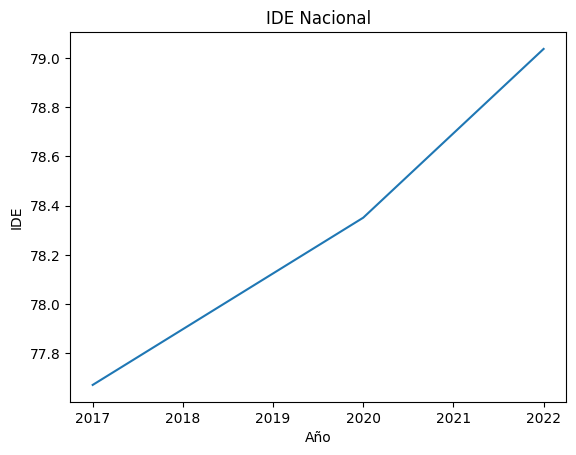

In [55]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame solo para el departamento 'dep1'
df_dep1 = tabla_base[tabla_base['Departamento'] == 'PERÚ']

# Crear la gráfica de líneas para el departamento 'dep1'
plt.plot(df_dep1['Año'], df_dep1['IDE'])

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('IDE')
plt.title('IDE Nacional')

# Mostrar la gráfica
plt.show()

In [57]:
import os

# Crear la carpeta "resultados" si no existe
if not os.path.exists('../resultados'):
    os.makedirs('../resultados')

# Guardar el DataFrame como un archivo Excel en la carpeta "resultados"
tabla_base.to_excel('../resultados/Cálculo_IDE.xlsx', index=False)
